In [1]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [4]:
import re
import nltk
nltk.download('punkt')
nltk.download('wordnet')
import math
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\riyag\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\riyag\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
#reading text from the books
T1= open("Animal Life in Field and Garden.txt",encoding="utf-8").read()

T2=open("DAVID VALLORY.txt",encoding="utf-8").read()

T3= open("Greensea Island.txt",encoding="utf-8").read()

L1=T1
L2=T2
L3=T3

In [6]:
#remove unneccesary text
def remove_text(text):
    text = re.sub(r'\*\*\* START OF THE PROJECT ([\s\S]*?)\*\*\*', ' ', text)
    text = re.sub(r'\n\*\*\* END OF THE PROJECT ([\s\S]*)',' ',text)
    text = re.sub(r'\n+CHAPTER.*\n\n.*\n+','\n\n', text)
    text = re.sub(r'\n+^M{0,4}(CM|CD|D?C{0,3})(XC|XL|L?X{0,3})(IX|IV|V?I{0,3})$\n.*\n','\n\n', text)
    return text

In [7]:
T1=remove_text(T1)
T2= remove_text(T2)
T3= remove_text(T3)

In [8]:
# convert all text to lower case and removing any link
def to_lower(text):
    text = text.lower()
    re.sub(r"http\S+", "\n", text)
    return text

In [9]:
#convert short forms to full forms
def convert(text):
    
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

In [10]:
T1 =to_lower(T1)
T2=to_lower(T2)
T1 = convert(T1)
T2= convert(T2)
T3= to_lower(T3)
T3= convert(T3)

In [11]:
#removing punctuation
T1=re.sub(r'[^\w\s]','',T1)
T2=re.sub(r'[^\w\s]','',T2)
T3=re.sub(r'[^\w\s]','',T3)

Tokenisation

In [12]:

from nltk.tokenize import word_tokenize

# splitting text into individual tokens(words)
def tokenize_word(text):
    words = word_tokenize(text)
    return words

In [13]:
words_T1=tokenize_word(T1)
words_T2=tokenize_word(T2)
words_T3=tokenize_word(T3)

Frequncy Analysis

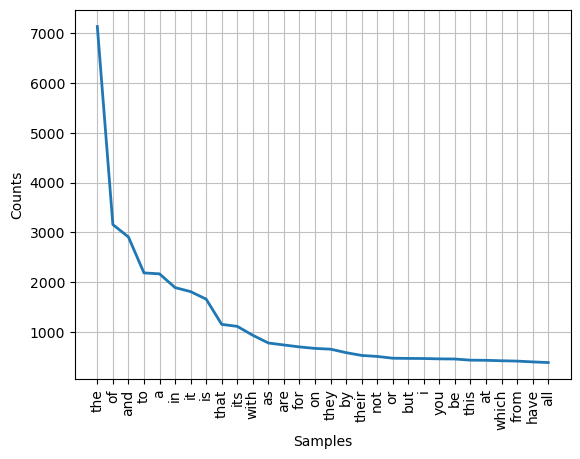

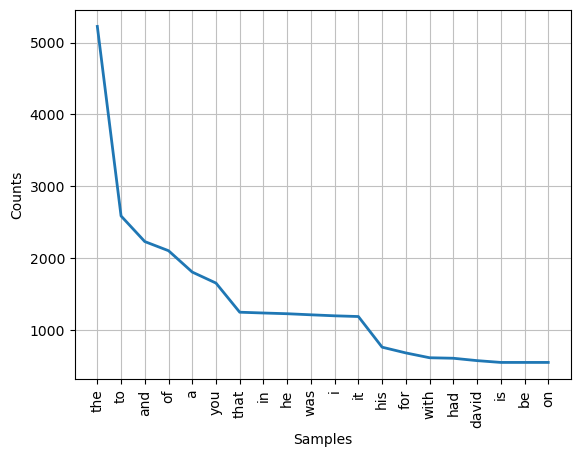

In [13]:
# analyzing frequency of words before removing stop words
frequency_words_T1 = nltk.FreqDist(words_T1)
frequency_words_T1.plot(30, cumulative=False)
frequency_words_T2 = nltk.FreqDist(words_T2)
frequency_words_T2.plot(20, cumulative=False)

Word Cloud

In [14]:
def stringConverter(s):       
    finstr = " "      
    return (finstr.join(s))
        
# converting LIST OF TOKENS to a string 
def tokens_to_string(words):       
    text = stringConverter(words)
    return text 

In [15]:
text_T1 = tokens_to_string(words_T1)
text_T2 = tokens_to_string(words_T2)

In [16]:
# word cloud for T1
wc_T1 = WordCloud(background_color="white", width=1000, height=1000, random_state=1,stopwords= [],collocations=False).generate(text_T1)
plt.imshow(wc_T1)

In [17]:
#word cloud for T2
wc_T2 = WordCloud(background_color="white", width=1000, height=1000, random_state=1,stopwords= [],collocations=False).generate(text_T2)
plt.imshow(wc_T2)

In [18]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [20]:
# remove stopwords printed above
def remove_stopwords(words):
    words = [w for w in words if w not in stopwords.words("english")]
    return words

In [21]:
nsw_words_T1 = remove_stopwords(words_T1)
nsw_words_T2 =remove_stopwords(words_T2)

Word Cloud After removing Stopwords

In [22]:
nsw_text_T1 = tokens_to_string(nsw_words_T1)
nsw_text_T2 = tokens_to_string(nsw_words_T2)

In [23]:
# word cloud for T1 after removing stopwords
wc_nsw_T1 = WordCloud(background_color="white", width=400, height=400, random_state=1,stopwords= [],collocations=False).generate(nsw_text_T1)
plt.imshow(wc_nsw_T1)

In [24]:
# word cloud for T2 after removing stopwords
wc_nsw_T2 = WordCloud(background_color="white", width=400, height=400, random_state=1,stopwords= [],collocations=False).generate(nsw_text_T2)
plt.imshow(wc_nsw_T2)

Frequency analysis after removing stopwords

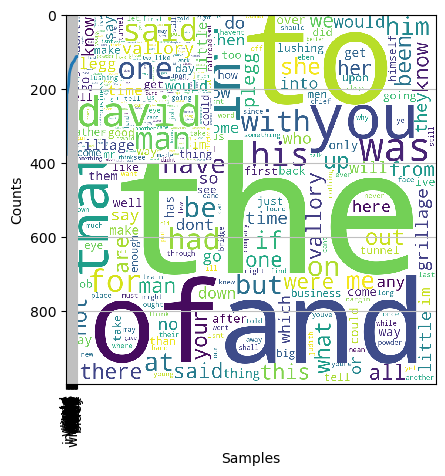

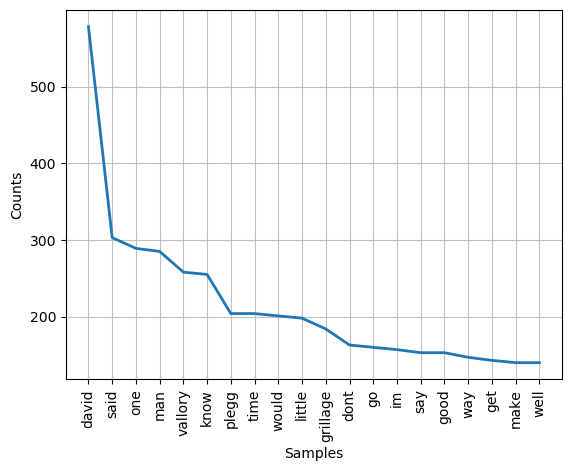

In [25]:
# analyzing frequency for T1 and T2 respectively
frequency_nsw_T1 = nltk.FreqDist(nsw_words_T1)
frequency_nsw_T1.plot(30, cumulative=False)

frequency_nsw_T2 = nltk.FreqDist(nsw_words_T2)
frequency_nsw_T2.plot(20, cumulative=False)

Word Length to frequency

In [26]:
def wordlength_to_frequency(words):
    frequency_of_words = []
    length_of_words=[]
    frequency_of_words.clear()
    length_of_words.clear()
    # finding the largest word in list.
    res = max(words, key = len)
    i=0
    frequency=0
    # calculating frequency of differenct length of words, appending them in respective positions.
    while(i<=len(res)):
        for word in words:
            if(len(word)==i):
                frequency= frequency+1
        frequency_of_words.append(frequency)
        length_of_words.append(i)
        frequency=0
        i=i+1

    # plotting graph of frequency_of_words to length_of_words.
    y = np.array(frequency_of_words)
    x = np.array(length_of_words)
    plt.plot(x, y)
    fin_list = range(math.floor(min(x)), math.ceil(max(x))+1)
    plt.xticks(fin_list)
    plt.xlabel("Length of word")
    plt.ylabel("Frequency of words")
    plt.title("Length of word to Frequency of words")
    plt.show()

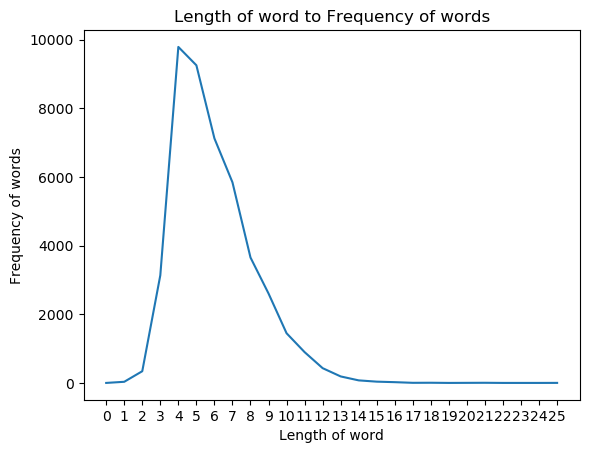

In [27]:
wordlength_to_frequency(nsw_words_T1)

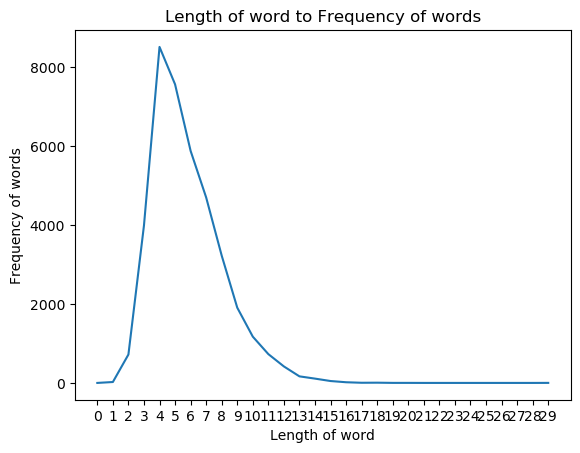

In [28]:
wordlength_to_frequency(nsw_words_T2)

POS tagging


In [29]:
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /home/jovyan/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [30]:
# POS tagging the words
res1=nltk.pos_tag(nsw_words_T1)
res2=nltk.pos_tag(nsw_words_T2)
from collections import Counter
def get_count(tags):
  counts_tags = Counter(tag for word,tag in tags)
  return counts_tags
def FrequencyPlot(dist):
  plt.rcParams["figure.figsize"] = [15, 3.50]
  plt.bar(dist.keys(),dist.values())
  plt.show()

Number of tags used in T1= 29


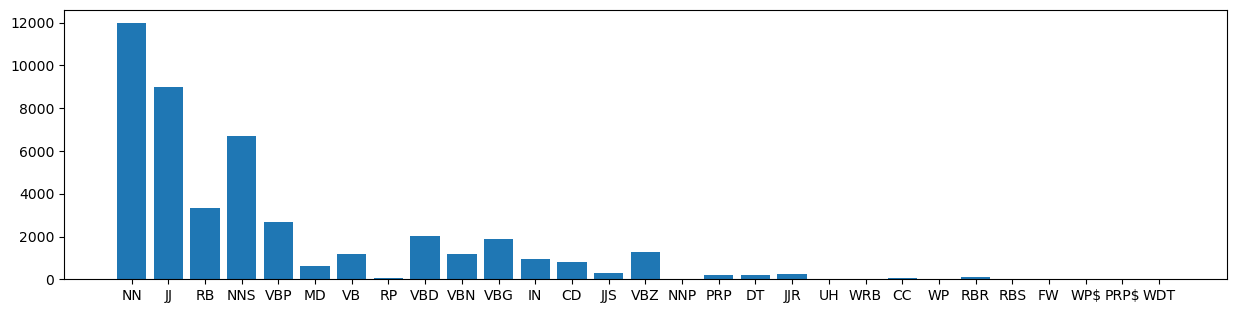

In [31]:
dist1=get_count(res1)
print("Number of tags used in T1=",len(dist1))
dist1
FrequencyPlot(dist1)

Number of tags used in T2= 33


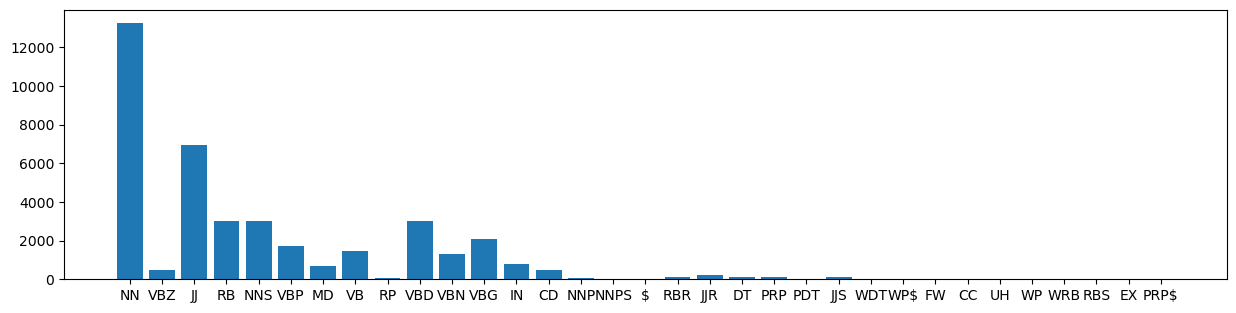

In [32]:
dist2=get_count(res2)
print("Number of tags used in T2=",len(dist2))
dist2
FrequencyPlot(dist2)

FINDING NOUNS AND VERBS IN BOTH NOVELS AND THEIR RESPECTIVE WORDNET CATEGORIES

In [14]:
nltk.download('averaged_perceptron_tagger')

def noun(tokens):
  is_noun = lambda pos: pos[:1] == 'N'
  nouns = [word for (word, pos) in nltk.pos_tag(tokens) if is_noun(pos)] 
  return nouns
def verb(tokens):
  is_verb = lambda pos: pos[:1] == 'V'
  verbs = [word for (word, pos) in nltk.pos_tag(tokens) if is_verb(pos)] 
  return verbs

noun1=noun(words_T1)
noun2=noun(words_T2)
verb1=verb(words_T1)
verb2=verb(words_T2)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\riyag\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [15]:
print("Number of nouns in book 1 and book 2 respectively are "+ str(len(noun1))+" and "+ str(len(noun2)))
print("Number of verbs in book 1 and book 2 respectively are "+ str(len(verb1))+" and "+ str(len(verb2)))

Number of nouns in book 1 and book 2 respectively are 21350 and 17612
Number of verbs in book 1 and book 2 respectively are 15400 and 17129


In [16]:
#Finding Respective Wordnet Categories

from nltk.corpus import wordnet as wn
def synset(words):
  categories=[]
  for word in words:
    cat=[]
    for synset in wn.synsets(word):
      if(('noun' in synset.lexname()) & ('Tops' not in synset.lexname()) ):
        cat.append(synset.lexname())
      if('verb' in synset.lexname()):
        cat.append(synset.lexname())
    categories.append(cat)
  return categories

In [17]:
#GIVES TOTAL NOUN LEXNAMES AND TOTAL VERB LEXNAMES FOR FREQUENCY DISTRIBUTIONS
def all_synsets(noun,verb):
  nouns=[]
  verbs=[]
  for word in noun:
    for synset in wn.synsets(word): 
      if(('noun' in synset.lexname()) & ('Tops' not in synset.lexname()) ):
        nouns.append(synset.lexname())
      if('verb' in synset.lexname()):
        verbs.append(synset.lexname())
  for word in verb:
    for synset in wn.synsets(word): 
      if(('noun' in synset.lexname()) & ('Tops' not in synset.lexname()) ):
        nouns.append(synset.lexname())
      if('verb' in synset.lexname()):
        verbs.append(synset.lexname())
      
  return nouns,verbs

In [18]:
noun_superset1,verb_superset1=all_synsets(noun1,verb1)
noun_superset2,verb_superset2=all_synsets(noun2,verb2)

In [19]:
print(noun1[124])

birds


In [20]:
noun_syn1=synset(noun1)
noun_syn2=synset(noun2)
verb_syn1=synset(verb1)
verb_syn2=synset(verb2)

In [21]:
print(noun_syn1[124][:])

['noun.animal', 'noun.food', 'noun.person', 'noun.communication', 'noun.artifact', 'verb.competition']


In [22]:
print(noun1[224])

patience


([<matplotlib.axis.XTick at 0x125759227f0>,
 [Text(0, 0, '0'),
  Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '3'),
  Text(0, 0, '4'),
  Text(0, 0, '5'),
  Text(0, 0, '6'),
  Text(0, 0, '7'),
  Text(0, 0, '8'),
  Text(0, 0, '9'),
  Text(0, 0, '10'),
  Text(0, 0, '11'),
  Text(0, 0, '12'),
  Text(0, 0, '13'),
  Text(0, 0, '14'),
  Text(0, 0, '15'),
  Text(0, 0, '16'),
  Text(0, 0, '17'),
  Text(0, 0, '18'),
  Text(0, 0, '19'),
  Text(0, 0, '20'),
  Text(0, 0, '21'),
  Text(0, 0, '22'),
  Text(0, 0, '23'),
  Text(0, 0, '24')])

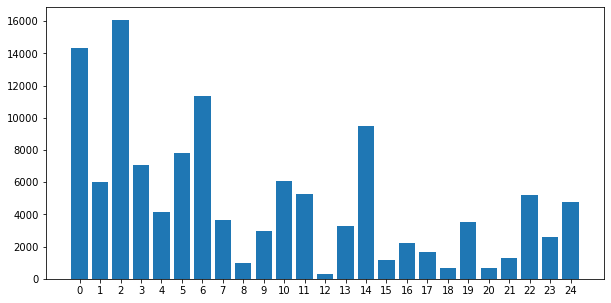

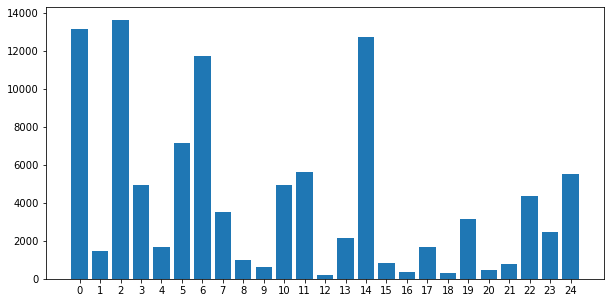

In [23]:
import numpy as np
labels, counts = np.unique(noun_superset1,return_counts=True)
import matplotlib.pyplot as plt 
ticks = range(len(counts))
plt.figure(figsize=(10,5))
plt.bar(ticks,counts, align='center')
plt.xticks(ticks, range(len(labels)))
labels, counts = np.unique(noun_superset2,return_counts=True)
ticks = range(len(counts))
plt.figure(figsize=(10,5))
plt.bar(ticks,counts, align='center')
plt.xticks(ticks, range(len(labels)))

In [24]:
print(labels)

['noun.act' 'noun.animal' 'noun.artifact' 'noun.attribute' 'noun.body'
 'noun.cognition' 'noun.communication' 'noun.event' 'noun.feeling'
 'noun.food' 'noun.group' 'noun.location' 'noun.motive' 'noun.object'
 'noun.person' 'noun.phenomenon' 'noun.plant' 'noun.possession'
 'noun.process' 'noun.quantity' 'noun.relation' 'noun.shape' 'noun.state'
 'noun.substance' 'noun.time']


([<matplotlib.axis.XTick at 0x12575ab45b0>,
 [Text(0, 0, '0'),
  Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '3'),
  Text(0, 0, '4'),
  Text(0, 0, '5'),
  Text(0, 0, '6'),
  Text(0, 0, '7'),
  Text(0, 0, '8'),
  Text(0, 0, '9'),
  Text(0, 0, '10'),
  Text(0, 0, '11'),
  Text(0, 0, '12'),
  Text(0, 0, '13'),
  Text(0, 0, '14')])

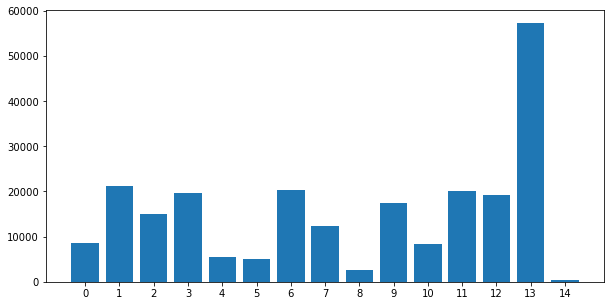

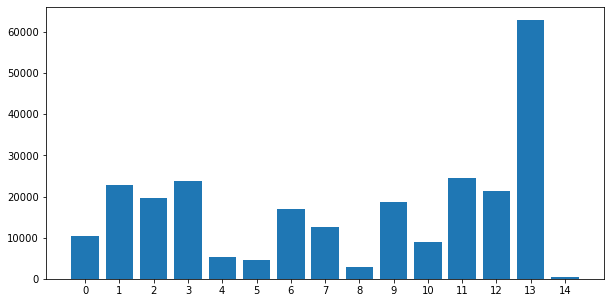

In [25]:
labels, counts = np.unique(verb_superset1,return_counts=True)
ticks = range(len(counts))
plt.figure(figsize=(10,5))
plt.bar(ticks,counts, align='center')
plt.xticks(ticks, range(len(labels)))
labels, counts = np.unique(verb_superset2,return_counts=True)
ticks = range(len(counts))
plt.figure(figsize=(10,5))
plt.bar(ticks,counts, align='center')
plt.xticks(ticks, range(len(labels)))

In [26]:
print(labels)


['verb.body' 'verb.change' 'verb.cognition' 'verb.communication'
 'verb.competition' 'verb.consumption' 'verb.contact' 'verb.creation'
 'verb.emotion' 'verb.motion' 'verb.perception' 'verb.possession'
 'verb.social' 'verb.stative' 'verb.weather']


In [26]:
pip install spacy

  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.7.4.2
    Uninstalling typing-extensions-3.7.4.2:
      Successfully uninstalled typing-extensions-3.7.4.2
Note: you may need to restart the kernel to use updated packages.


ERROR: tensorflow-gpu 2.5.0 requires grpcio~=1.34.0, which is not installed.
ERROR: tensorflow-gpu 2.5.0 requires tensorflow-estimator<2.6.0,>=2.5.0rc0, which is not installed.
ERROR: tensorflow-gpu 2.5.0 has requirement h5py~=3.1.0, but you'll have h5py 2.10.0 which is incompatible.
ERROR: tensorflow-gpu 2.5.0 has requirement typing-extensions~=3.7.4, but you'll have typing-extensions 4.0.1 which is incompatible.


In [29]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_lg

nlp = en_core_web_lg.load()
d1 = nlp(T1)
d2 = nlp(T2)
print("there are total "+str(len(d1.ents))+" entities in book 1 and "+str(len(d2.ents))+" in book 2")

there are total 1277 entities in book 1 and 1456 in book 2


In [30]:
def entity_recognition(text):
  doc=nlp(text)
  person=[]
  org=[]
  location=[]
  for X in doc:  
    if (X.ent_type_=='PERSON') and X.text not in person:
      person.append(X.text)
    if (X.ent_type_=='ORG')and X.text not in org:
      org.append(X.text)
    if ((X.ent_type_=='LOC') or (X.ent_type_=='GPE')) and X.text not in location:
      location.append(X.text)
  return person,org,location

In [31]:
person1,org1,location1=entity_recognition(T1)
person2,org2,location2=entity_recognition(T2)
print("number of person entities in book 1 and book 2 respectively are "+str(len(person1))+" and "+str(len(person2)))
print("number of organization entities in book 1 and book 2 respectively are "+str(len(org1))+" and "+str(len(org2)))
print("number of location entities in book 1 and book 2 respectively are "+str(len(location1))+" and "+str(len(location2)))

number of person entities in book 1 and book 2 respectively are 71 and 150
number of organization entities in book 1 and book 2 respectively are 52 and 77
number of location entities in book 1 and book 2 respectively are 27 and 37


In [32]:
def freq(str_list): 
    unique_words = set(str_list)
    counts = {}
    for words in unique_words : 
        counts[words] = str_list.count(words)
    return counts

In [33]:
X = freq(person1)
print(sorted(X.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)) 

[('xxi', 1), ('xvii', 1), ('xii', 1), ('willow', 1), ('wheat', 1), ('vii', 1), ('victor', 1), ('uncle', 1), ('truee', 1), ('trig', 1), ('tom', 1), ('tokooa', 1), ('thumb', 1), ('this', 1), ('the', 1), ('teoooo', 1), ('teo', 1), ('swan', 1), ('simons', 1), ('robin', 1), ('pree', 1), ('plee', 1), ('pauls', 1), ('paul', 1), ('oneeyed', 1), ('nightmoths', 1), ('martins', 1), ('martin', 1), ('louis', 1), ('lii', 1), ('known', 1), ('jules', 1), ('john', 1), ('jeroen', 1), ('jay', 1), ('jacques', 1), ('ivory', 1), ('iii', 1), ('hunt', 1), ('hugotranslator', 1), ('hellingman', 1), ('geometermoth', 1), ('flourens', 1), ('florence', 1), ('fabre', 1), ('emile', 1), ('eagle', 1), ('cruciferæ', 1), ('crow', 1), ('craa', 1), ('calledwhich', 1), ('cabbagebutterfly', 1), ('bush', 1), ('buffon', 1), ('bob', 1), ('benjamin', 1), ('aymay', 1), ('appletree', 1), ('aidmay', 1), ('a', 1), ('160', 1), ('                              ', 1), ('                             ', 1), ('           ', 1), ('      ', 

In [34]:
X = freq(location1)
print(sorted(X.items(), key = lambda kv:(kv[1], kv[0]),reverse=True))

[('united', 1), ('the', 1), ('states', 1), ('sahara', 1), ('rocky', 1), ('pyrenees', 1), ('provence', 1), ('paris', 1), ('ocean', 1), ('norway', 1), ('mediterranean', 1), ('locust', 1), ('lapland', 1), ('india', 1), ('heights', 1), ('grove', 1), ('germany', 1), ('france', 1), ('europe', 1), ('dormice', 1), ('central', 1), ('beech', 1), ('arles', 1), ('arctic', 1), ('america', 1), ('alsace', 1), ('africa', 1)]


In [43]:
#Performance Measures

#book1
B1_text1='Emile already had his finger in his mouth, passing it from one tooth to another, to count them'
B1_text2='We call ugly those that differ from these accepted models, and if very unlike we call them hideous.'

#book2
B2_text1='Vallory’s smile was still good-natured'
B2_text2='I have been on Government work in Florida--rivers and harbors'

hand_label_1_1=['PER','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O']
hand_label_1_2=['O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O']
hand_label_2_1=['PER','O','O','O','O','O']
hand_label_2_2=['O','O','O','O','ORG','O','O','LOC','O','O']

#labels generated 

labelB1T1=([(word.text) for word in nlp(B1_text1).ents])
labelB1T2=([(word.text) for word in nlp(B1_text2).ents])

labelB2T1=([(word.text) for word in nlp(B2_text1).ents])
labelB2T2=([(word.text) for word in nlp(B2_text2).ents])

from typing import List, Dict, Sequence

class Matrices:
    def __init__(self, sents_true_labels: Sequence[Sequence[Dict]], sents_pred_labels: Sequence[Sequence[Dict]]):
        self.sents_true_labels = sents_true_labels
        self.sents_pred_labels = sents_pred_labels
        self.types = set(entity['type'] for sent in sents_true_labels for entity in sent)
        self.confusion_matrices = {type: {'TP':0, 'TN':0, 'FP':0, 'FN':0} for type in self.types}
        self.scores = {type: {'p':0, 'r':0, 'f1':0} for type in self.types}
        
    def cal_confusion_matrices(self) -> Dict[str, Dict]:
        """Calculate confusion matrices for all sentences."""
        for true_labels, pred_labels in zip(self.sents_true_labels, sents_pred_labels):
            for true_label in true_labels:
                entity_type = true_label['type']
                prediction_hit_count = 0
                for pred_label in pred_labels:
                    if pred_label['type'] != entity_type:
                        continue
                    if pred_label['start_idx'] == true_label['start_idx'] and pred_label['end_idx'] == true_label['end_idx'] and pred_label['text'] == true_label['text']: #TP
                        self.confusion_matrices[entity_type]['TP'] += 1
                        prediction_hit_count += 1
                    elif ((pred_label['start_idx'] == true_label['start_idx']) or (pred_label['end_idx'])) and pred_label['text'] != true_label['text']:
                        self.confusion_matrices[entity_type]['FP'] += 1
                        self.confusion_matrices[entity_type]['FN'] += 1
                        prediction_hit_count += 1
                if prediction_hit_count != 1: #FN, model cannot make a prediction for true_label
                    self.confusion_matrices[entity_type]['FN'] += 1
                prediction_hit_count = 0 # reset to default

    def cal_scores(self) -> Dict[str, Dict]:
        """Calculate precision, recall, f1."""
        confusion_matrices = self.confusion_matrices
        scores = {type: {'p':0, 'r':0, 'f1':0} for type in self.types}

        for entity_type, confusion_matrix in confusion_matrices.items():
            if confusion_matrix['TP'] == 0 and confusion_matrix['FP'] == 0:
                scores[entity_type]['p'] = 0
            else:
                scores[entity_type]['p'] = confusion_matrix['TP'] / (confusion_matrix['TP'] + confusion_matrix['FP'])

            if confusion_matrix['TP'] == 0 and confusion_matrix['FN'] == 0:
                scores[entity_type]['r'] = 0
            else:
                scores[entity_type]['r'] = confusion_matrix['TP'] / (confusion_matrix['TP'] + confusion_matrix['FN'])

            if scores[entity_type]['p'] ==0 and scores[entity_type]['r'] ==0:
                scores[entity_type]['f1'] = 0
            else:
                scores[entity_type]['f1'] = 2*scores[entity_type]['p']*scores[entity_type]['r'] / (scores[entity_type]['p'] + scores[entity_type]['r'])
            self.scores = scores
    def print_confusion_matrices(self):
        for entity_type, matrix in self.confusion_matrices.items():
            print(f"{entity_type}: {matrix}")

    def print_scores(self):
        for entity_type, score in self.scores.items():
            print(f"{entity_type}: f1 {score['f1']:.4f}, precision {score['p']:.4f}, recall {score['r']:.4f}")

for x in range(len(labelB1T1)):
    if (labelB1T1[x]=='') or (labelB1T1[x] not in ['ORG', 'LOC', 'GPE', 'PER']):
        labelB1T1[x] = 'O'
for x in range(len(labelB1T2)):
    if (labelB1T2[x]=='') or (labelB1T2[x] not in ['ORG', 'LOC', 'GPE', 'PER']):
        labelB1T2[x] = 'O'
for x in range(len(labelB2T1)):
    if (labelB2T1[x]=='') or (labelB2T1[x] not in ['ORG', 'LOC', 'GPE', 'PER']):
        labelB2T1[x] = 'O'
for x in range(len(labelB2T2)):
    if (labelB2T2[x]=='') or (labelB2T2[x] not in ['ORG', 'LOC', 'GPE', 'PER']):
        labelB2T2[x] = 'O'
print(type(hand_label_1_1))
print(type(labelB1T1))
matrics1 = Matrices(hand_label_1_1,labelB1T1)
matrics1.cal_confusion_matrices()
matrics1.print_confusion_matrices()
matrics1.cal_scores()
matrics1.print_scores() 

<class 'list'>
<class 'list'>


TypeError: string indices must be integers

In [ ]:
import spacy
from spacy.gold import GoldParse
from spacy.scorer import Scorer

def evaluate(ner_model, examples):
    scorer = Scorer()
    for input_, annot in examples:
        doc_gold_text = ner_model.make_doc(input_)
        gold = GoldParse(doc_gold_text, entities=annot)
        pred_value = ner_model(input_)
        scorer.score(pred_value, gold)
    return scorer.scores

# example run

#book1
B1_text1='Emile already had his finger in his mouth, passing it from one tooth to another, to count them'
B1_text2='We call ugly those that differ from these accepted models, and if very unlike we call them hideous.'

#book2
B2_text1='Vallory’s smile was still good-natured'
B2_text2='I have been on Government work in Florida--rivers and harbors'

hand_label_1_1=['PER','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O']
hand_label_1_2=['O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O']
hand_label_2_1=['PER','O','O','O','O','O']
hand_label_2_2=['O','O','O','O','ORG','O','O','LOC','O','O']
examples = [
    ('Emile already had his finger in his mouth, passing it from one tooth to another, to count them',
     [(0,4,'PERSON')]),
    ('We call ugly those that differ from these accepted models, and if very unlike we call them hideous.'),
    ('Vallory’s smile was still good-natured',
     [(0,6, 'PERSON')]),
    ('I have been on Government work in Florida--rivers and harbors',
     [(15,24, 'ORGANISATION'),(34,48,'LOCATION')])
]

ner_model = spacy.load(ner_model_path) # for spaCy's pretrained use 'en_core_web_sm'
results = evaluate(ner_model, examples)

In [89]:
data = [T1,T2]

In [95]:
import pandas as pd

def create_dataframe(matrix, tokens):

    doc_names = [f't{i+1}' for i, _ in enumerate(matrix)]
    df = pd.DataFrame(data=matrix, index=doc_names, columns=tokens)
    return(df)

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf_vect = TfidfVectorizer()
vector_matrix = Tfidf_vect.fit_transform(data)

tokens = Tfidf_vect.get_feature_names()
create_dataframe(vector_matrix.toarray(),tokens)

,10,106,114,117,122,129,13,137,144,154,...,yousomebody,youth,youthful,zeal,zeezeezee,zest,zigzag,zigzags,zipzap,écorcheur
t1,0.000286,0.000143,0.000143,0.000000,0.000143,0.000143,0.000143,0.000143,0.000143,0.000143,...,0.000000,0.000000,0.000000,0.000573,0.00043,0.000143,0.00043,0.000143,0.00043,0.000143
t2,0.000000,0.000000,0.000000,0.000475,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000158,0.000475,0.000158,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000


In [97]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity_matrix = cosine_similarity(vector_matrix)
create_dataframe(cosine_similarity_matrix,['T1','T2'])

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float


,T1,T2
t1,1.00000,0.89479
t2,0.89479,1.00000


In [98]:
data = [T1,T3]

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf_vect = TfidfVectorizer()
vector_matrix = Tfidf_vect.fit_transform(data)

tokens = Tfidf_vect.get_feature_names()
create_dataframe(vector_matrix.toarray(),tokens)

,10,106,114,117,122,129,13,137,144,154,...,yousomebody,youth,youthful,zeal,zeezeezee,zest,zigzag,zigzags,zipzap,écorcheur
t1,0.000286,0.000143,0.000143,0.000000,0.000143,0.000143,0.000143,0.000143,0.000143,0.000143,...,0.000000,0.000000,0.000000,0.000573,0.00043,0.000143,0.00043,0.000143,0.00043,0.000143
t2,0.000000,0.000000,0.000000,0.000475,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000158,0.000475,0.000158,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000


In [100]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity_matrix = cosine_similarity(vector_matrix)
create_dataframe(cosine_similarity_matrix,['T1','T3'])

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float


,T1,T3
t1,1.00000,0.89479
t2,0.89479,1.00000


In [101]:
data = [T2,T3]

In [102]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity_matrix = cosine_similarity(vector_matrix)
create_dataframe(cosine_similarity_matrix,['T2','T3'])

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float


,T2,T3
t1,1.00000,0.89479
t2,0.89479,1.00000


In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf_vect = TfidfVectorizer()
vector_matrix = Tfidf_vect.fit_transform(data)

tokens = Tfidf_vect.get_feature_names()
create_dataframe(vector_matrix.toarray(),tokens)

,103,113,117,127,143,16,160,173,17th,18,...,youth,youthankful,youthful,youve,youyoure,yyes,zat,ze,zee,zhentlemen
t1,0.000177,0.000177,0.000000,0.000177,0.000177,0.000177,0.000177,0.000177,0.000000,0.000000,...,0.001383,0.000177,0.000503,0.011134,0.000353,0.000177,0.000707,0.000353,0.000353,0.000177
t2,0.000000,0.000000,0.000475,0.000000,0.000000,0.000000,0.000000,0.000000,0.000158,0.000158,...,0.000338,0.000000,0.000113,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


DOING LEMMATIZATION AND EVALUATING THE RESULTS AGAIN

In [115]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
lemmatizer = WordNetLemmatizer()
def nltk2wn_tag(nltk_tag):
  if nltk_tag.startswith('J'):
    return wordnet.ADJ
  elif nltk_tag.startswith('V'):
    return wordnet.VERB
  elif nltk_tag.startswith('N'):
    return wordnet.NOUN
  elif nltk_tag.startswith('R'):
    return wordnet.ADV
  else:                    
    return None
def lemmatize_sentence(sentence):
  nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))    
  wn_tagged = map(lambda x: (x[0], nltk2wn_tag(x[1])), nltk_tagged)
  res_words = []
  for word, tag in wn_tagged:
    if tag is None:                        
      res_words.append(word)
    else:
      res_words.append(lemmatizer.lemmatize(word, tag))
  return " ".join(res_words)

In [116]:
T1 = lemmatize_sentence(T1)

In [117]:
T2 = lemmatize_sentence(T2)

In [118]:
T3 = lemmatize_sentence(T3)

In [119]:
data = [T1,T2]

from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf_vect = TfidfVectorizer()
vector_matrix = Tfidf_vect.fit_transform(data)

tokens = Tfidf_vect.get_feature_names()
create_dataframe(vector_matrix.toarray(),tokens)

,10,103,106,113,114,122,127,129,13,137,...,zat,ze,zeal,zee,zeezeezee,zest,zhentlemen,zigzag,zipzap,écorcheur
t1,0.000274,0.000000,0.000137,0.000000,0.000137,0.000137,0.000000,0.000137,0.000137,0.000137,...,0.000000,0.000000,0.000548,0.000000,0.000411,0.000137,0.000000,0.000548,0.000411,0.000137
t2,0.000000,0.000163,0.000000,0.000163,0.000000,0.000000,0.000163,0.000000,0.000000,0.000000,...,0.000653,0.000326,0.000000,0.000326,0.000000,0.000000,0.000163,0.000000,0.000000,0.000000


In [120]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity_matrix = cosine_similarity(vector_matrix)
create_dataframe(cosine_similarity_matrix,['d1','d2'])

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float


,d1,d2
t1,1.000000,0.926471
t2,0.926471,1.000000


In [121]:
data = [T1,T3]

from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf_vect = TfidfVectorizer()
vector_matrix = Tfidf_vect.fit_transform(data)

tokens = Tfidf_vect.get_feature_names()
create_dataframe(vector_matrix.toarray(),tokens)

,10,106,114,117,122,129,13,137,144,154,...,yourselves,yousomebody,youth,youthful,zeal,zeezeezee,zest,zigzag,zipzap,écorcheur
t1,0.000274,0.000137,0.000137,0.000000,0.000137,0.000137,0.000137,0.000137,0.000137,0.000137,...,0.000585,0.000000,0.000000,0.000000,0.000549,0.000411,0.000137,0.000549,0.000411,0.000137
t2,0.000000,0.000000,0.000000,0.000427,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000101,0.000142,0.000427,0.000142,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [122]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity_matrix = cosine_similarity(vector_matrix)
create_dataframe(cosine_similarity_matrix,['d1','d3'])

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float


,d1,d3
t1,1.000000,0.908356
t2,0.908356,1.000000


In [123]:
data = [T2,T3]

from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf_vect = TfidfVectorizer()
vector_matrix = Tfidf_vect.fit_transform(data)

tokens = Tfidf_vect.get_feature_names()
create_dataframe(vector_matrix.toarray(),tokens)

,103,113,117,127,143,16,160,173,17th,18,...,youth,youthankful,youthful,youve,youyoure,yyes,zat,ze,zee,zhentlemen
t1,0.000163,0.000163,0.000000,0.000163,0.000163,0.000163,0.000163,0.000163,0.000000,0.000000,...,0.001277,0.000163,0.000464,0.010277,0.000326,0.000163,0.000653,0.000326,0.000326,0.000163
t2,0.000000,0.000000,0.000427,0.000000,0.000000,0.000000,0.000000,0.000000,0.000142,0.000142,...,0.000304,0.000000,0.000101,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [124]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity_matrix = cosine_similarity(vector_matrix)
create_dataframe(cosine_similarity_matrix,['d2','d3'])

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float


,d2,d3
t1,1.000000,0.966997
t2,0.966997,1.000000
